In [1]:
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
import numpy as np
import math
import time

In [2]:
# Define sigmoid function
def sigmoidSimple(x):
    return 1 / (1 + math.exp(-x))

In [3]:
# Define sigmoid function
def sigmoid(b0, b1, x):
    return 1 / (1 + math.exp(-(b0 + b1*x)))

In [4]:
# Define sigmoid function
def sigmoid2(b0, b1, x):
    y = math.exp(b0 + b1*x) / (1 + math.exp(b0 + b1*x))
    return y

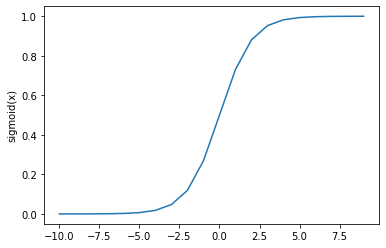

In [5]:
# Plot the sigmoid function
# Solution A: use loop for calc. Y vector elements one by one
X = np.arange(-10, 10, 1)
Y=[]
for x in X:
    Y.append(sigmoidSimple(x))
plt.plot(X, Y)
plt.ylabel('sigmoid(x)')
plt.show()

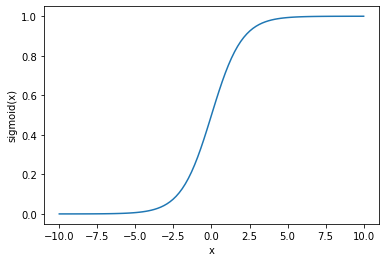

In [6]:
# Solution A: use operation on array
x = np.linspace(-10, 10, 100)
z = 1 / (1 + np.exp(-x))
plt.plot(x, z)
plt.xlabel("x")
plt.ylabel("sigmoid(x)")
plt.show()

In [7]:
# Play with sigmoid function
def plotSingleSigmoids():
    B0 = np.arange(-3, 4, 1)
    for b0 in B0:
        X = np.arange(-10, 10, 1)
        Y = []
        for x in X:
            Y.append(sigmoid2(b0, 1, x))
        plt.plot(X, Y, label='b0='+str(b0))
        plt.ylabel('sigmoid(x)')
        plt.legend()
        plt.show()
        time.sleep(1)

    time.sleep(3)
    
    B1 = np.arange(-3, 4, 1)
    for b1 in B1:
        X = np.arange(-10, 10, 1)
        Y = []
        for x in X:
            Y.append(sigmoid2(0, b1, x))
        plt.plot(X, Y, label='b1='+str(b1))
        # linear function
        # Yl = []
        # for xl in X:
        #     Yl.append(b1 * xl)
        # plt.plot(X, Yl, label='lin.b1='+str(b1))
        # plt.ylabel('f(x)')
        plt.legend()
        plt.show()
        time.sleep(1)


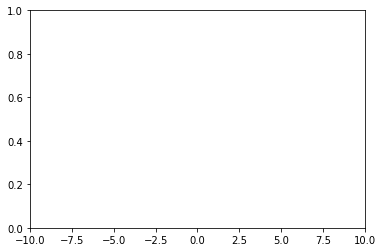

In [8]:
fig = plt.figure()
ax = plt.axes(xlim=(-10, 10), ylim=(0, 1))
line, = ax.plot([], [], lw=3)

In [9]:
def init():
    line.set_data([], [])
    return line,

In [10]:
def animateB0(frame):
    b0 = frame - 20
    X = np.arange(-10, 10, 1)
    Y = []
    for x in X:
        Y.append(sigmoid2(b0, 1, x))
    line.set_data(X, Y)
    return line,

In [11]:
def animateB1(frame):
    b1 = frame/20
    X = np.arange(-10, 10, 1)
    Y = []
    for x in X:
        Y.append(sigmoid2(0, b1, x))
    line.set_data(X, Y)
    return line,

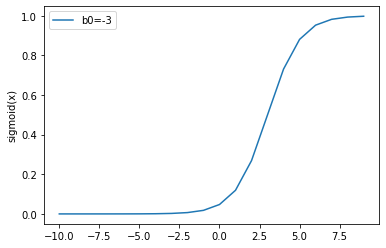

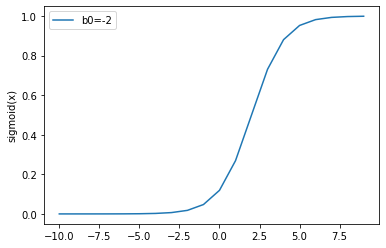

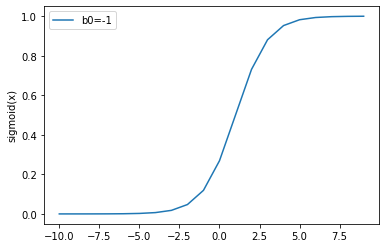

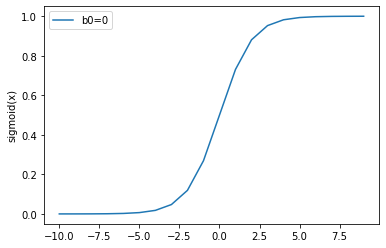

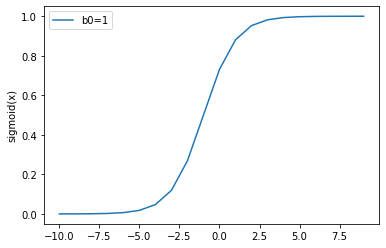

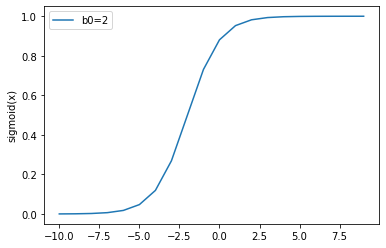

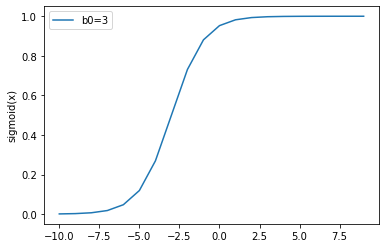

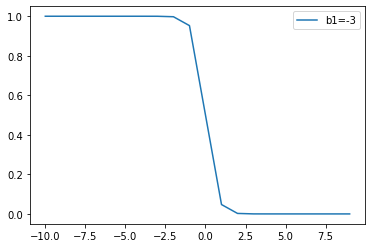

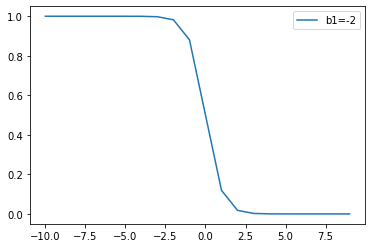

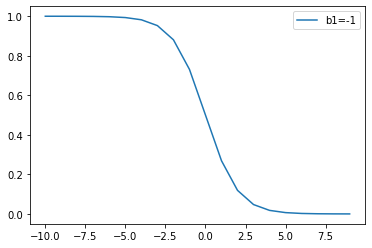

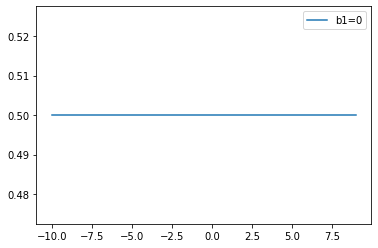

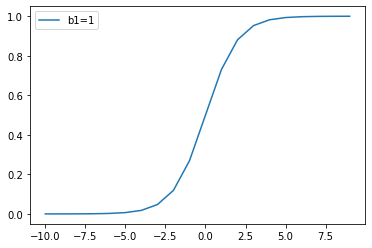

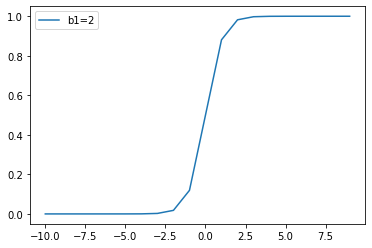

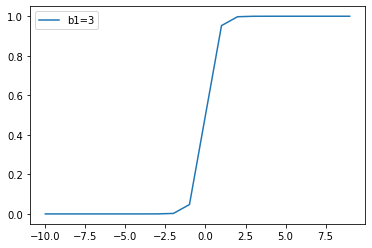

MovieWriter imagemagick unavailable; trying to use <class 'matplotlib.animation.FFMpegWriter'> instead.
MovieWriter stderr:
[gif @ 0x7fd4f7800600] GIF muxer supports only a single video GIF stream.
Could not write header for output file #0 (incorrect codec parameters ?): Invalid argument
Error initializing output stream 0:0 -- 



CalledProcessError: Command '['ffmpeg', '-f', 'rawvideo', '-vcodec', 'rawvideo', '-s', '432x288', '-pix_fmt', 'rgba', '-r', '20.0', '-loglevel', 'error', '-i', 'pipe:', '-vcodec', 'h264', '-pix_fmt', 'yuv420p', '-y', 'sigmoid_b0.gif']' returned non-zero exit status 1.

In [12]:
plotSingleSigmoids()
anim = FuncAnimation(fig, animateB0, init_func = init, frames=50, interval=50, blit=True)
anim.save('sigmoid_b0.gif', writer='imagemagick')
anim = FuncAnimation(fig, animateB1, init_func = init, frames=100, interval=100, blit=True)
anim.save('sigmoid_b1.gif', writer='imagemagick')